In [1]:
# Import libraries
from tcia_utils import nbia
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib_venn import venn2

In [2]:
# load python data dictionary
df_api = pd.read_pickle("data_catalogue_tcia_api.pkl")
df = pd.read_excel("patientIDs_final.xlsx", header=None)
patientID_list = df.iloc[:, 0].dropna().astype(str).tolist()

In [3]:
df_final = df_api[df_api["PatientID"].isin(patientID_list)]
selected_rows_imaging = ["MR", "CT", "PT"]
df_final = df_final[df_final["Modality"].isin(selected_rows_imaging)]
df_final

,SeriesInstanceUID,StudyInstanceUID,Modality,SeriesDate,SeriesDescription,BodyPartExamined,SeriesNumber,Collection,Site,PatientID,...,FileSize,DateReleased,StudyDesc,StudyDate,Authorized,ReleasedStatus,ThirdPartyAnalysis,ProtocolName,AdmittingDiagnosisDescription,AnnotationsFlag
2542,1.3.6.1.4.1.14519.5.2.1.9203.4002.254402301259...,1.3.6.1.4.1.14519.5.2.1.9203.4002.285233690698...,MR,02-20-1997,Localizer,BREAST,1.0,TCGA-BRCA,MSKCC,TCGA-AO-A129,...,6092534,06-29-2012,NaN,02-20-1997,1,NaN,NaN,NaN,NaN,NaN
2543,1.3.6.1.4.1.14519.5.2.1.9203.4002.262256986635...,1.3.6.1.4.1.14519.5.2.1.9203.4002.285233690698...,MR,02-20-1997,T2 right breast,BREAST,2.0,TCGA-BRCA,MSKCC,TCGA-AO-A129,...,4605232,06-29-2012,NaN,02-20-1997,1,NaN,NaN,NaN,NaN,NaN
2544,1.3.6.1.4.1.14519.5.2.1.9203.4002.127264241780...,1.3.6.1.4.1.14519.5.2.1.9203.4002.285233690698...,MR,02-20-1997,T1 right breast non fat sat,BREAST,3.0,TCGA-BRCA,MSKCC,TCGA-AO-A129,...,4875382,06-29-2012,NaN,02-20-1997,1,NaN,NaN,NaN,NaN,NaN
2545,1.3.6.1.4.1.14519.5.2.1.9203.4002.107831988969...,1.3.6.1.4.1.14519.5.2.1.9203.4002.285233690698...,MR,02-20-1997,T1 right breast,BREAST,4.0,TCGA-BRCA,MSKCC,TCGA-AO-A129,...,4875412,06-29-2012,NaN,02-20-1997,1,NaN,NaN,NaN,NaN,NaN
2546,1.3.6.1.4.1.14519.5.2.1.9203.4002.279662331086...,1.3.6.1.4.1.14519.5.2.1.9203.4002.285233690698...,MR,02-20-1997,T1 right breast post,BREAST,5.0,TCGA-BRCA,MSKCC,TCGA-AO-A129,...,4876600,06-29-2012,NaN,02-20-1997,1,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
323925,1.3.6.1.4.1.14519.5.2.1.3320.3273.258078660438...,1.3.6.1.4.1.14519.5.2.1.3320.3273.465923680632...,PT,07-04-2000,AC,NaN,12.0,CPTAC-PDA,IIMO,C3N-01898,...,32471746,08-18-2023,PET-CT WB ST,07-04-2000,1,Yes,NO,6.1 WB,NaN,NaN
323926,1.3.6.1.4.1.14519.5.2.1.3320.3273.173093325143...,1.3.6.1.4.1.14519.5.2.1.3320.3273.116078088248...,PT,07-04-2000,Q.Clear,NaN,14.0,CPTAC-PDA,IIMO,C3N-01898,...,11420820,08-18-2023,PET-CT WATROBA,07-04-2000,1,Yes,NO,6.1 WB,NaN,NaN
323927,1.3.6.1.4.1.14519.5.2.1.3320.3273.149688623582...,1.3.6.1.4.1.14519.5.2.1.3320.3273.116078088248...,CT,07-04-2000,CTAC,NaN,2.0,CPTAC-PDA,IIMO,C3N-01898,...,21150000,08-18-2023,PET-CT WATROBA,07-04-2000,1,Yes,NO,6.1 WB,NaN,NaN
323928,1.3.6.1.4.1.14519.5.2.1.3320.3273.103864141863...,1.3.6.1.4.1.14519.5.2.1.3320.3273.465923680632...,CT,07-04-2000,SCOUT,NaN,1.0,CPTAC-PDA,IIMO,C3N-01898,...,3749836,08-18-2023,PET-CT WB ST,07-04-2000,1,Yes,NO,6.1 WB,NaN,NaN


In [9]:
# Number of unique PatientIDs
num_patients = len(df_final["PatientID"].unique())
print("Number of unique patients:", num_patients)

# Number of unique Collections
num_collections = len(df_final["Collection"].unique())
print("Number of unique collections:", num_collections)

# Number of unique Modalities
num_modalities = len(df_final["Modality"].unique())
print("Number of unique modalities:", num_modalities)

# Number of unique BodyPartExamined
num_bodyparts = len(df_final["BodyPartExamined"].unique())
print("Number of unique BodyPartExamined:", num_bodyparts)


Number of unique patients: 1441
Number of unique collections: 24
Number of unique modalities: 3
Number of unique BodyPartExamined: 30


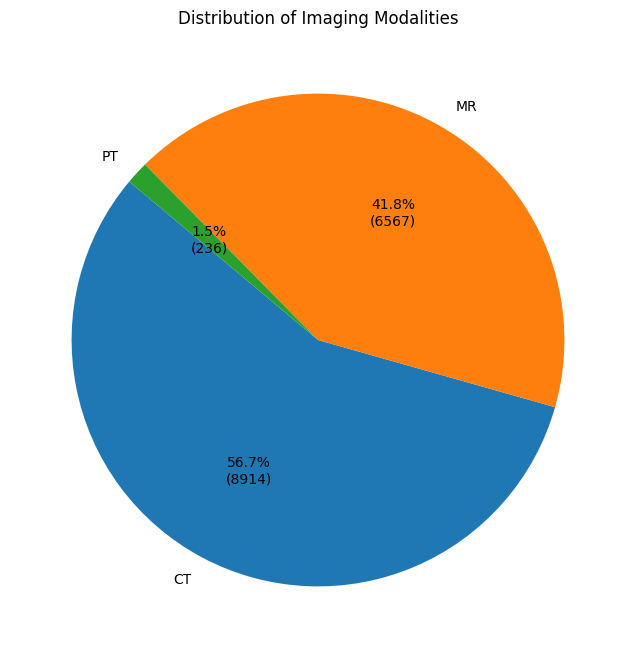

  Modality  Count
0       CT   8914
1       MR   6567
2       PT    236


In [8]:
import matplotlib.pyplot as plt

# Count each modality
modality_counts = df_final['Modality'].value_counts().reset_index()
modality_counts.columns = ['Modality', 'Count']

# Function to show both count and percentage
def func(pct, all_vals):
    absolute = int(round(pct/100.*sum(all_vals)))
    return "{:.1f}%\n({:d})".format(pct, absolute)

# Plot pie chart
plt.figure(figsize=(8, 8))
plt.pie(modality_counts['Count'], labels=modality_counts['Modality'], 
        autopct=lambda pct: func(pct, modality_counts['Count']),
        startangle=140)
plt.title('Distribution of Imaging Modalities')
plt.show()

# Print counts
print(modality_counts)

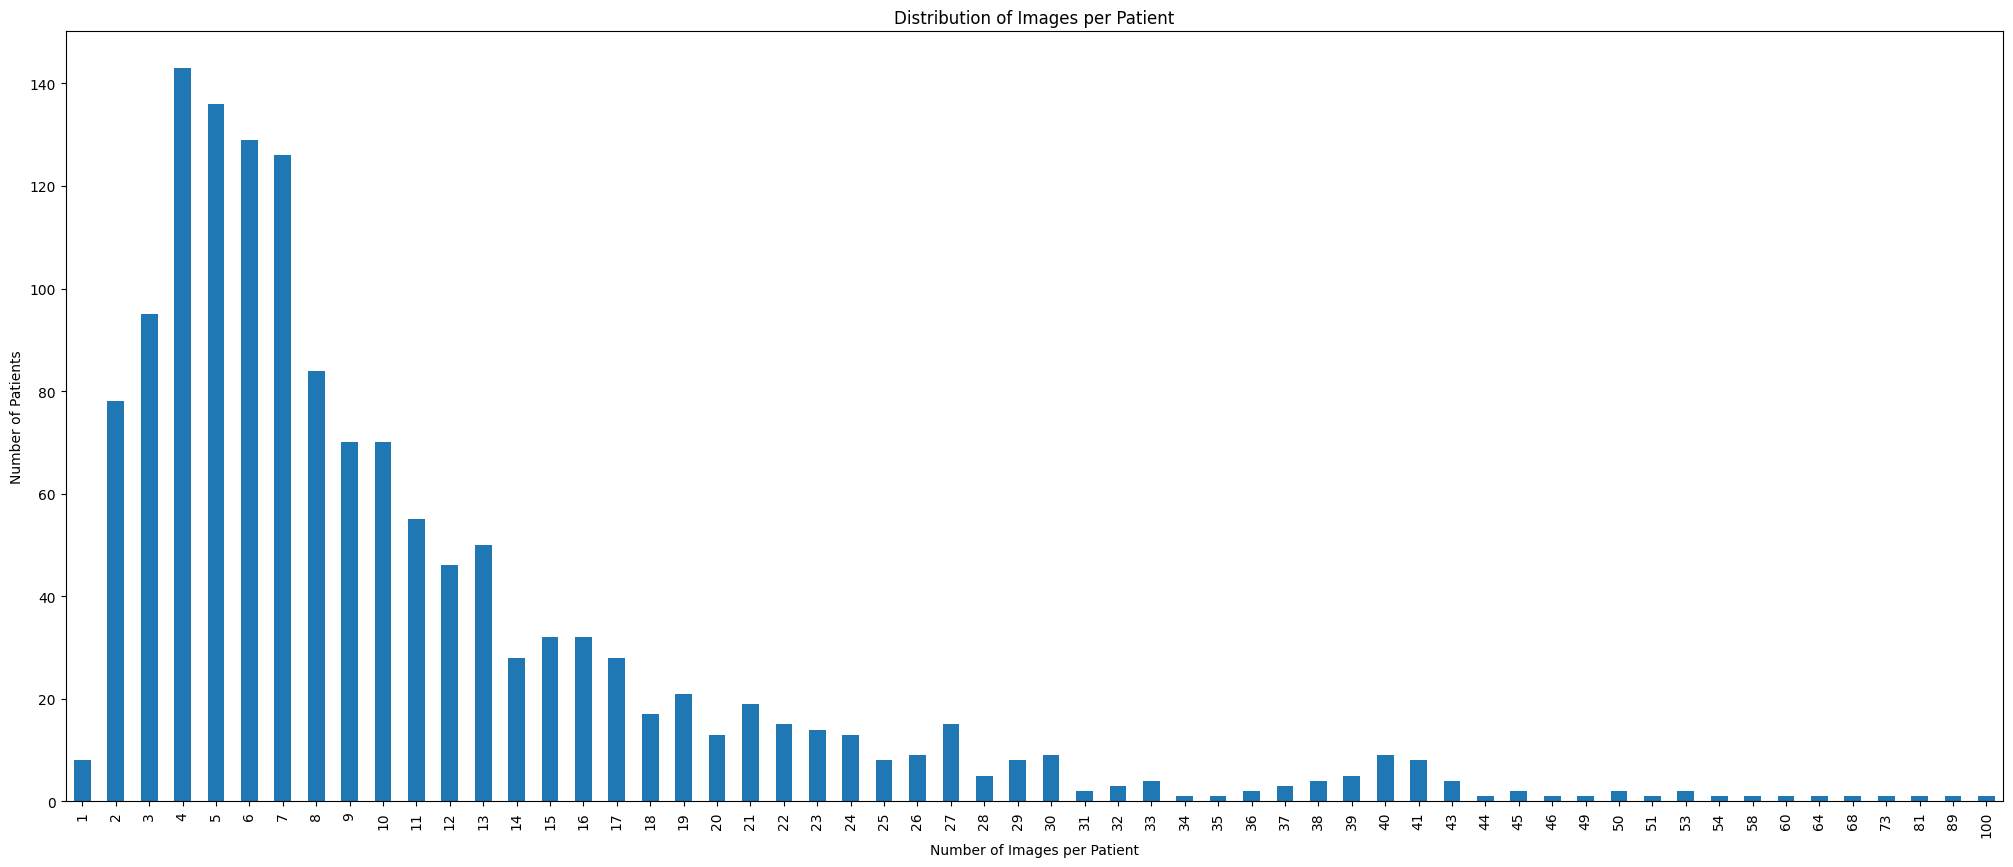

    num_images  num_patients
0            1             8
1            2            78
2            3            95
3            4           143
4            5           136
5            6           129
6            7           126
7            8            84
8            9            70
9           10            70
10          11            55
11          12            46
12          13            50
13          14            28
14          15            32
15          16            32
16          17            28
17          18            17
18          19            21
19          20            13
20          21            19
21          22            15
22          23            14
23          24            13
24          25             8
25          26             9
26          27            15
27          28             5
28          29             8
29          30             9
30          31             2
31          32             3
32          33             4
33          34

In [17]:
# See how many images are available per patient
counts = df_final.groupby('PatientID').size()

plt.figure(figsize=(25,10))
counts.value_counts().sort_index().plot(kind='bar', title='Distribution of Images per Patient')
plt.xlabel('Number of Images per Patient'); plt.ylabel('Number of Patients'); plt.show()

distribution_table = counts.value_counts().sort_index().reset_index()
distribution_table.columns = ['num_images', 'num_patients']
print(distribution_table)

In [11]:
# Seemed some patients have more than 50 images, which is suspicious!!! Let's check.
counts = df_final.groupby('PatientID').size()
patients_over_50 = counts[counts > 50]
print(patients_over_50)

PatientID
C3L-03467        54
TCGA-CW-5581     53
TCGA-CW-5585    100
TCGA-CW-5587     60
TCGA-CW-6088     64
TCGA-CW-6090     89
TCGA-D1-A169     73
TCGA-DD-A3A0     51
TCGA-DD-A4NG     58
TCGA-DD-A4NH     53
TCGA-DD-A4NO     68
TCGA-DD-A4NP     81
dtype: int64


   Number of Unique Modalities  Number of Patients
0                            1                1252
1                            2                 184
2                            3                   5


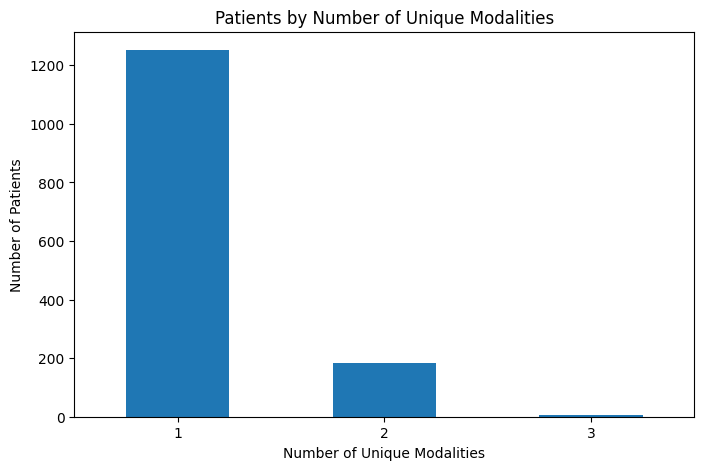

In [12]:
# See how many unique imaging modalities are available per patient
dist = df_final.groupby('PatientID')['Modality'].nunique().value_counts().sort_index()
table = dist.reset_index()
table.columns = ['Number of Unique Modalities', 'Number of Patients']
print(table)

dist.plot(kind='bar', title='Patients by Number of Unique Modalities', figsize=(8,5))
plt.xlabel('Number of Unique Modalities'); plt.ylabel('Number of Patients'); plt.xticks(rotation=0)
plt.show()

In [13]:
# One step further - see what combinations of modalities are common by patient
patient_modalities = df_final.groupby('PatientID')['Modality'].apply(lambda x: tuple(sorted(x.unique())))
num_modalities = patient_modalities.apply(len)
dist = num_modalities.value_counts().sort_index().reset_index()
dist.columns = ['Number of Unique Modalities', 'Number of Patients']
combo_counts = patient_modalities.value_counts().reset_index()
combo_counts.columns = ['Combination', 'Count']
def top_n_combinations(n, N=5):
    combos = combo_counts[combo_counts['Combination'].apply(len) == n]
    top_combos = combos.sort_values('Count', ascending=False).head(N)['Combination'].tolist()
    top_combos += [()] * (N - len(top_combos))
    return top_combos
top_cols = ['Top 1', 'Top 2', 'Top 3', 'Top 4', 'Top 5']
dist[top_cols] = dist['Number of Unique Modalities'].apply(lambda x: pd.Series(top_n_combinations(x)))
print(dist)

   Number of Unique Modalities  Number of Patients         Top 1     Top 2  \
0                            1                1252         (CT,)     (MR,)   
1                            2                 184      (CT, MR)  (CT, PT)   
2                            3                   5  (CT, MR, PT)        ()   

   Top 3 Top 4 Top 5  
0  (PT,)    ()    ()  
1     ()    ()    ()  
2     ()    ()    ()  


    BodyPartExamined  Number of Images
0             KIDNEY              2531
1             BREAST              1858
2              LIVER              1711
3            ABDOMEN              1275
4             PELVIS               897
5              CHEST               881
6              OVARY               836
7            BLADDER               833
8             UTERUS               833
9             Kidney               555
10              LUNG               532
11            CERVIX               488
12           STOMACH               308
13          PANCREAS               214
14          PROSTATE               207
15         ESOPHAGUS               126
16    CHESTABDPELVIS                75
17             COLON                73
18     ABDOMENPELVIS                61
19            RECTUM                34
20           THYROID                28
21         LOWERLIMB                15
22            TSPINE                11
23      CHESTABDOMEN                 9
24         WHOLEBODY     

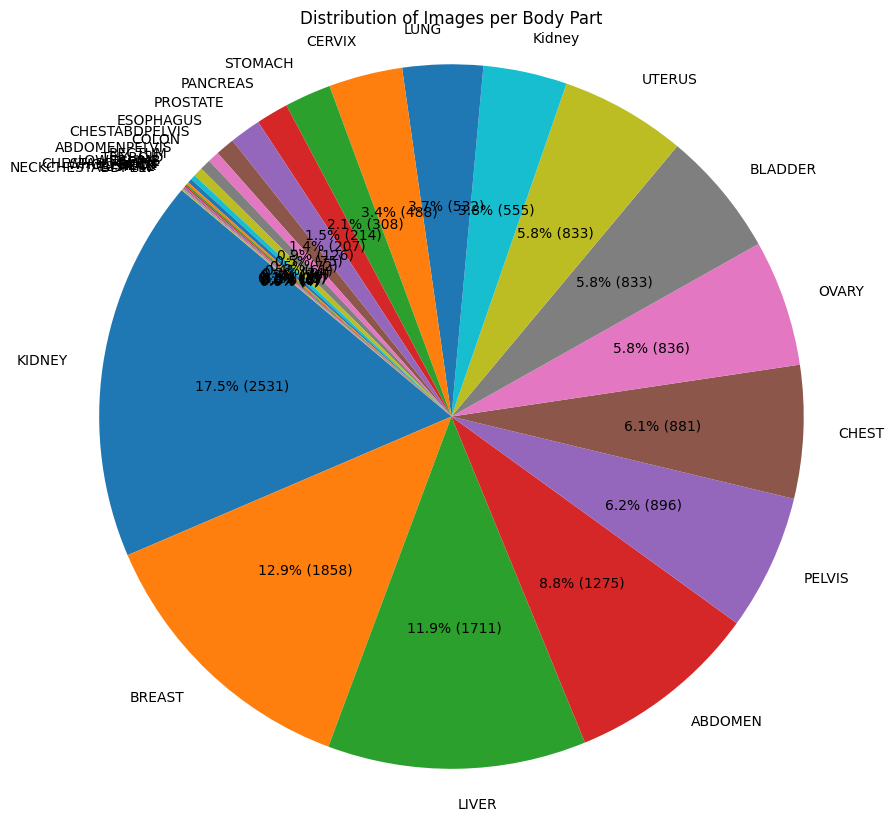

In [14]:
import matplotlib.pyplot as plt

# Count number of images per body part
cancer_counts = df_final['BodyPartExamined'].value_counts().reset_index()
cancer_counts.columns = ['BodyPartExamined', 'Number of Images']
print(cancer_counts)

# Plot pie chart
plt.figure(figsize=(10,10))
plt.pie(
    cancer_counts['Number of Images'], 
    labels=cancer_counts['BodyPartExamined'], 
    autopct=lambda p: f'{p:.1f}% ({int(p * sum(cancer_counts["Number of Images"])/100)})',
    startangle=140
)
plt.title('Distribution of Images per Body Part')
plt.axis('equal')  # Equal aspect ratio ensures the pie is circular
plt.show()


     Collection  Number of Images
0     TCGA-KIRC              2650
1     TCGA-BRCA              1858
2    CPTAC-UCEC              1780
3     TCGA-LIHC              1688
4     TCGA-BLCA              1018
5     TCGA-UCEC               909
6   CPTAC-CCRCC               855
7       TCGA-OV               836
8     CPTAC-PDA               808
9     TCGA-LUAD               617
10    TCGA-CESC               488
11   CPTAC-LUAD               448
12    TCGA-KIRP               376
13    TCGA-STAD               308
14    TCGA-LUSC               275
15    TCGA-PRAD               207
16   CPTAC-LSCC               148
17    TCGA-ESCA               126
18    TCGA-KICH               109
19    TCGA-COAD                73
20    CPTAC-AML                45
21    TCGA-READ                34
22    TCGA-SARC                33
23    TCGA-THCA                28


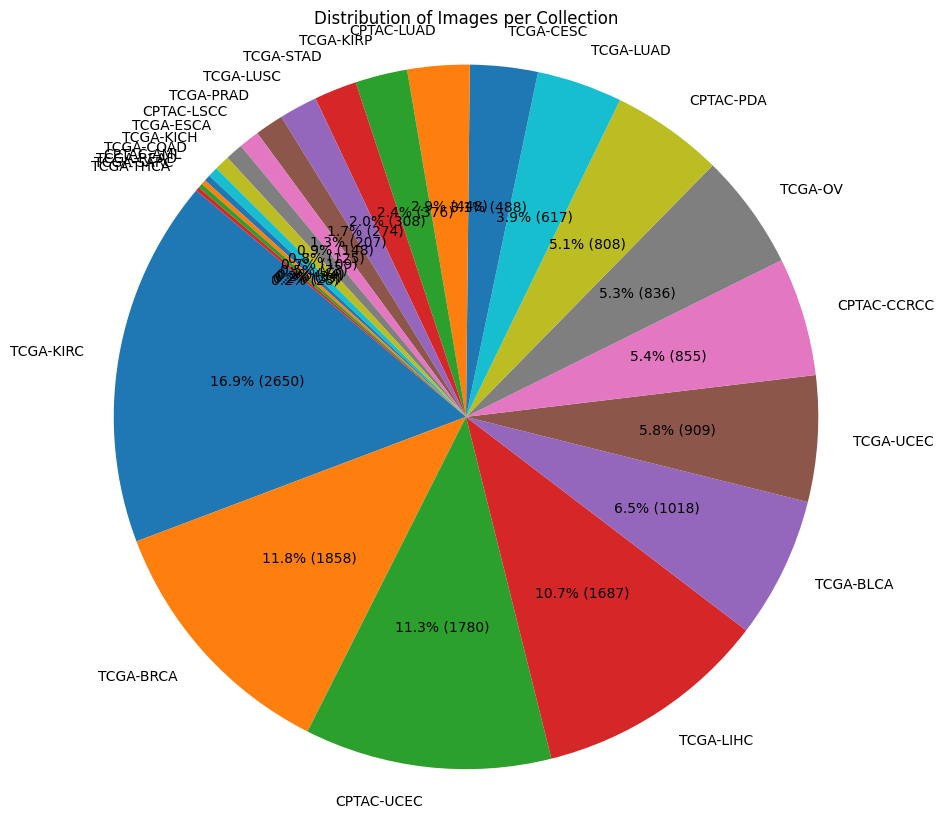

In [15]:
import matplotlib.pyplot as plt

# Count number of images per Collection
cancer_counts = df_final['Collection'].value_counts().reset_index()
cancer_counts.columns = ['Collection', 'Number of Images']
print(cancer_counts)

# Plot pie chart
plt.figure(figsize=(10,10))
plt.pie(
    cancer_counts['Number of Images'],
    labels=cancer_counts['Collection'],
    autopct=lambda p: f'{p:.1f}% ({int(p * sum(cancer_counts["Number of Images"])/100)})',
    startangle=140
)
plt.title('Distribution of Images per Collection')
plt.axis('equal')  # Equal aspect ratio ensures the pie is circular
plt.show()

    BodyPartExamined  Number of Patients
0             KIDNEY                 300
1              OVARY                 142
2             BREAST                 137
3            ABDOMEN                 135
4            BLADDER                 107
5              CHEST                 105
6              LIVER                  98
7               LUNG                  67
8             UTERUS                  58
9             CERVIX                  54
10           STOMACH                  46
11            PELVIS                  41
12          PANCREAS                  26
13             COLON                  21
14            Kidney                  16
15    CHESTABDPELVIS                  16
16         ESOPHAGUS                  16
17          PROSTATE                  14
18     ABDOMENPELVIS                  12
19           THYROID                   6
20      CHESTABDOMEN                   5
21         WHOLEBODY                   3
22            RECTUM                   3
23              

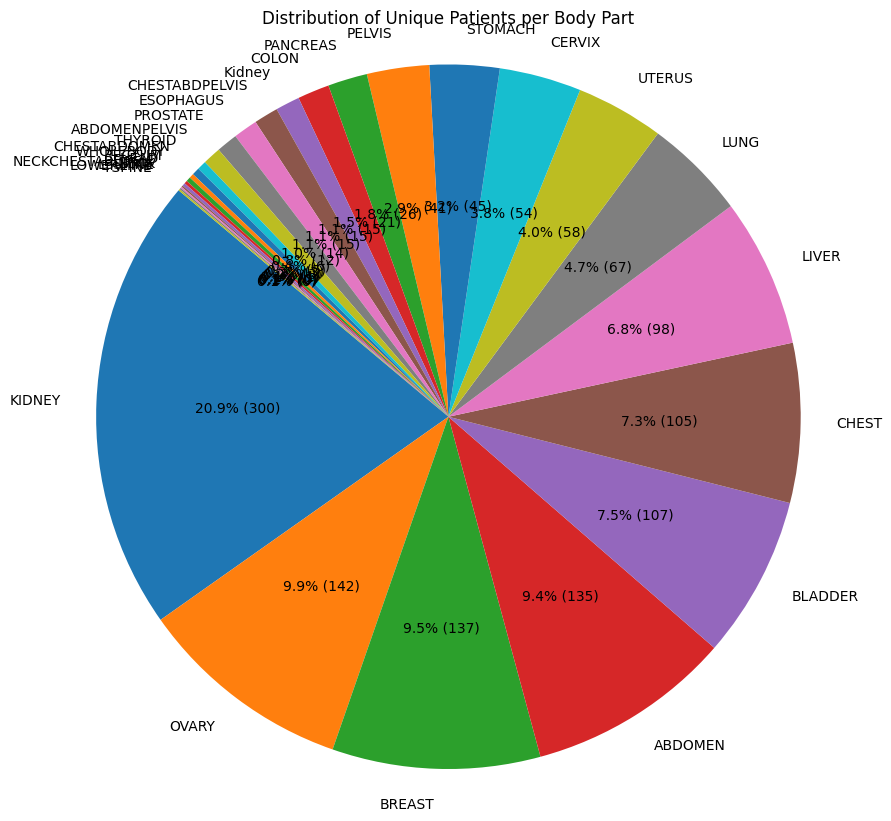

In [16]:
import matplotlib.pyplot as plt

# Count number of unique patients per Body Part
patient_counts = df_final.groupby('BodyPartExamined')['PatientID'].nunique().sort_values(ascending=False).reset_index()
patient_counts.columns = ['BodyPartExamined', 'Number of Patients']
print(patient_counts)

# Plot pie chart
plt.figure(figsize=(10,10))
plt.pie(
    patient_counts['Number of Patients'],
    labels=patient_counts['BodyPartExamined'],
    autopct=lambda p: f'{p:.1f}% ({int(p * sum(patient_counts["Number of Patients"])/100)})',
    startangle=140
)
plt.title('Distribution of Unique Patients per Body Part')
plt.axis('equal')  # Ensures pie chart is circular
plt.show()


     Collection  Number of Patients
0     TCGA-KIRC                 267
1       TCGA-OV                 142
2     TCGA-BRCA                 137
3     TCGA-BLCA                 120
4     TCGA-LIHC                  97
5    CPTAC-UCEC                  82
6     CPTAC-PDA                  78
7   CPTAC-CCRCC                  70
8     TCGA-LUAD                  68
9     TCGA-UCEC                  65
10    TCGA-CESC                  54
11    TCGA-STAD                  46
12   CPTAC-LUAD                  38
13    TCGA-LUSC                  37
14    TCGA-KIRP                  33
15   CPTAC-LSCC                  22
16    TCGA-COAD                  21
17    TCGA-ESCA                  16
18    TCGA-KICH                  15
19    TCGA-PRAD                  14
20    TCGA-THCA                   6
21    CPTAC-AML                   5
22    TCGA-SARC                   5
23    TCGA-READ                   3


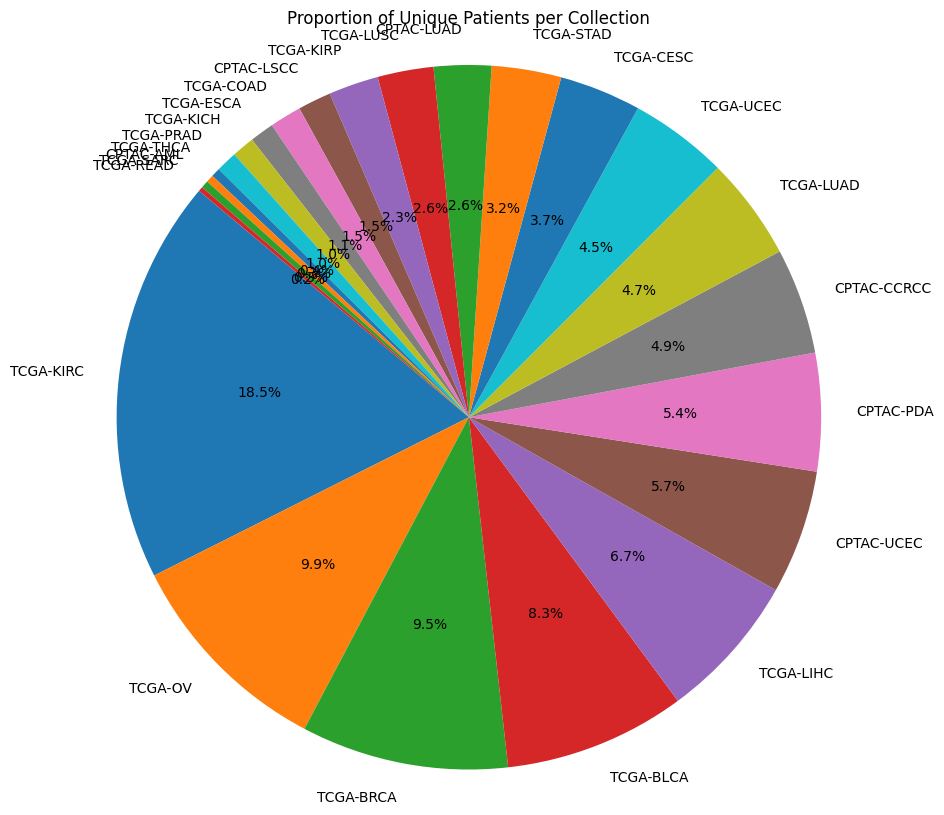

In [18]:
import matplotlib.pyplot as plt

# Count number of patients per Collection
patient_counts = df_final.groupby('Collection')['PatientID'].nunique().sort_values(ascending=False).reset_index(name='Number of Patients')
print(patient_counts)

# Pie chart
plt.figure(figsize=(10,10))
plt.pie(patient_counts['Number of Patients'], labels=patient_counts['Collection'], autopct='%1.1f%%', startangle=140)
plt.title('Proportion of Unique Patients per Collection')
plt.axis('equal')  # Equal aspect ratio ensures the pie is circular
plt.show()

# Omics Data

In [14]:
import pandas as pd
from pathlib import Path
from tqdm import tqdm

# -------------------------
# Configuration
# -------------------------
FOLDER = Path("metadata_from_gcd_for_patientIDs_from_tcia_api")

# -------------------------
# Processing
# -------------------------
records = []

# Iterate through TSV files with progress bar
tsv_files = list(FOLDER.glob("*.tsv"))

for file in tqdm(tsv_files, desc="Processing TSV files"):
    # Extract patient ID from filename
    patient_id = file.stem.replace("gdc_metadata_", "")

    # Load the TSV
    df = pd.read_csv(file, sep="\t").fillna("")

    # Filter for open-access files
    df = df[df["access"] == "open"]
    df["PatientID"] = patient_id
    # Add record
    records.append(df)

# Debug print (optional)
print(f"Loaded {len(records)} open-access metadata tables.")

# Optional: Combine all into one DataFrame
all_df = pd.concat(records, ignore_index=True)
print(all_df.head())


Processing TSV files:   0%|          | 0/1450 [00:00<?, ?it/s]

Processing TSV files: 100%|██████████| 1450/1450 [00:06<00:00, 235.75it/s]


Loaded 1450 open-access metadata tables.
  access acl.0 average_base_quality average_insert_size average_read_length  \
0   open  open                                                                
1   open  open                                                                
2   open  open                                                                
3   open  open                                                                
4   open  open                                                                

                   created_datetime                data_category data_format  \
0  2022-08-25T06:54:33.002092-05:00  Simple Nucleotide Variation         MAF   
1  2023-07-20T11:23:25.336637-05:00              DNA Methylation        IDAT   
2  2024-07-12T15:05:10.314664-05:00        Copy Number Variation         TXT   
3  2023-07-20T09:19:25.975064-05:00              DNA Methylation         TXT   
4  2020-09-11T13:07:28.475129-05:00        Copy Number Variation         TXT   

  d

In [15]:
selected_rows_omics = [
    #    'Biospecimen_Biospecimen Supplement_nan_BCR Auxiliary XML',
    #    'Biospecimen_Biospecimen Supplement_nan_BCR Biotab',
    #    'Biospecimen_Biospecimen Supplement_nan_BCR SSF XML',
    #    'Biospecimen_Biospecimen Supplement_nan_BCR XML',
    #    'Biospecimen_Slide Image_Diagnostic Slide_SVS',
    #    'Biospecimen_Slide Image_Tissue Slide_SVS',
    #    'Clinical_Clinical Supplement_nan_BCR Biotab',
    #    'Clinical_Clinical Supplement_nan_BCR OMF XML',
    #    'Clinical_Clinical Supplement_nan_BCR XML',
    #    'Clinical_Pathology Report_nan_PDF',
    #    'Copy Number Variation_Allele-specific Copy Number Segment_Genotyping Array_TXT',
    #    'Copy Number Variation_Allele-specific Copy Number Segment_WGS_TXT',
    #    'Copy Number Variation_Copy Number Segment_Genotyping Array_TXT',
    #    'Copy Number Variation_Copy Number Segment_WGS_TXT',
       'Copy Number Variation_Gene Level Copy Number_Genotyping Array_TSV',
    #    'Copy Number Variation_Gene Level Copy Number_WGS_TSV',
    #    'Copy Number Variation_Masked Copy Number Segment_Genotyping Array_TXT',
       'DNA Methylation_Masked Intensities_Methylation Array_IDAT',
    #    'DNA Methylation_Methylation Beta Value_Methylation Array_TXT',
       'Proteome Profiling_Protein Expression Quantification_Reverse Phase Protein Array_TSV',
       'Simple Nucleotide Variation_Masked Somatic Mutation_WXS_MAF',
       'Transcriptome Profiling_Gene Expression Quantification_RNA-Seq_TSV',
    #    'Transcriptome Profiling_Isoform Expression Quantification_miRNA-Seq_TSV',
    #    'Transcriptome Profiling_Isoform Expression Quantification_miRNA-Seq_TXT',
    #    'Transcriptome Profiling_Raw Intensities_Expression Array_CEL',
    #    'Transcriptome Profiling_miRNA Expression Quantification_miRNA-Seq_TSV',
    #    'Transcriptome Profiling_miRNA Expression Quantification_miRNA-Seq_TXT'
       ]

cols_to_combine = ["data_category", "data_type", "experimental_strategy", "data_format"]
all_df["Modality"] = all_df[cols_to_combine].astype(str).agg("_".join, axis=1)
# all_df["Modality"]

all_df2 = all_df[all_df["Modality"].isin(selected_rows_omics)]
all_df2

,access,acl.0,average_base_quality,average_insert_size,average_read_length,created_datetime,data_category,data_format,data_release,data_type,...,msi_score,msi_status,plate_name,plate_well,proportion_coverage_10x,proportion_coverage_30x,proportion_targets_no_coverage,tumor_ploidy,tumor_purity,Modality
0,open,open,,,,2022-08-25T06:54:33.002092-05:00,Simple Nucleotide Variation,MAF,35.0 - 44.0,Masked Somatic Mutation,...,,,,,,,,,,Simple Nucleotide Variation_Masked Somatic Mut...
1,open,open,,,,2023-07-20T11:23:25.336637-05:00,DNA Methylation,IDAT,38.0 - 44.0,Masked Intensities,...,,,CPTAC_EPIC_Methyl_03,D05,,,,,,DNA Methylation_Masked Intensities_Methylation...
8,open,open,,,,2022-08-25T06:54:18.609699-05:00,Simple Nucleotide Variation,MAF,35.0 - 44.0,Masked Somatic Mutation,...,,,,,,,,,,Simple Nucleotide Variation_Masked Somatic Mut...
9,open,open,,,,2022-01-06T09:06:16.796372-06:00,Transcriptome Profiling,TSV,32.0 - 44.0,Gene Expression Quantification,...,,,,,,,,,,Transcriptome Profiling_Gene Expression Quanti...
10,open,open,,,,2023-07-20T11:06:31.090897-05:00,DNA Methylation,IDAT,38.0 - 44.0,Masked Intensities,...,,,CPTAC_EPIC_Methyl_03,D05,,,,,,DNA Methylation_Masked Intensities_Methylation...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53553,open,open,,,,2021-03-30T17:59:08.977222-05:00,Proteome Profiling,TSV,30.0 - 44.0,Protein Expression Quantification,...,,,NaN,NaN,,,,,,Proteome Profiling_Protein Expression Quantifi...
53561,open,open,,,,2023-04-25T10:00:23.750278-05:00,Copy Number Variation,TSV,38.0 - 44.0,Gene Level Copy Number,...,,,NaN,NaN,,,,,,Copy Number Variation_Gene Level Copy Number_G...
53568,open,open,,,,2021-12-13T17:54:29.107225-06:00,Transcriptome Profiling,TSV,32.0 - 44.0,Gene Expression Quantification,...,,,NaN,NaN,,,,,,Transcriptome Profiling_Gene Expression Quanti...
53572,open,open,,,,2022-01-14T18:50:57.534835-06:00,Copy Number Variation,TSV,32.0 - 44.0,Gene Level Copy Number,...,,,NaN,NaN,,,,,,Copy Number Variation_Gene Level Copy Number_G...


In [16]:
# Check whether filtering is correct
all_df2["Modality"].unique()

array(['Simple Nucleotide Variation_Masked Somatic Mutation_WXS_MAF',
       'DNA Methylation_Masked Intensities_Methylation Array_IDAT',
       'Transcriptome Profiling_Gene Expression Quantification_RNA-Seq_TSV',
       'Copy Number Variation_Gene Level Copy Number_Genotyping Array_TSV',
       'Proteome Profiling_Protein Expression Quantification_Reverse Phase Protein Array_TSV'],
      dtype=object)

In [17]:
all_df2["Modality"] = all_df2["Modality"].replace("Simple Nucleotide Variation_Masked Somatic Mutation_WXS_MAF", "SNV")
all_df2["Modality"] = all_df2["Modality"].replace("DNA Methylation_Masked Intensities_Methylation Array_IDAT", "DNA Methylation")
all_df2["Modality"] = all_df2["Modality"].replace("Transcriptome Profiling_Gene Expression Quantification_RNA-Seq_TSV", "RNA-seq")
all_df2["Modality"] = all_df2["Modality"].replace("Copy Number Variation_Gene Level Copy Number_Genotyping Array_TSV", "CNV")
all_df2["Modality"] = all_df2["Modality"].replace("Proteome Profiling_Protein Expression Quantification_Reverse Phase Protein Array_TSV", "Proteome Profiling")


C:\Users\EkanayakeMevan\AppData\Local\Temp\ipykernel_18816\2845398429.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_df2["Modality"] = all_df2["Modality"].replace("Simple Nucleotide Variation_Masked Somatic Mutation_WXS_MAF", "SNV")
C:\Users\EkanayakeMevan\AppData\Local\Temp\ipykernel_18816\2845398429.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_df2["Modality"] = all_df2["Modality"].replace("DNA Methylation_Masked Intensities_Methylation Array_IDAT", "DNA Methylation")
C:\Users\Ekanayake

In [18]:
# Check whether filtering is correct
all_df2["Modality"].unique()

array(['SNV', 'DNA Methylation', 'RNA-seq', 'CNV', 'Proteome Profiling'],
      dtype=object)

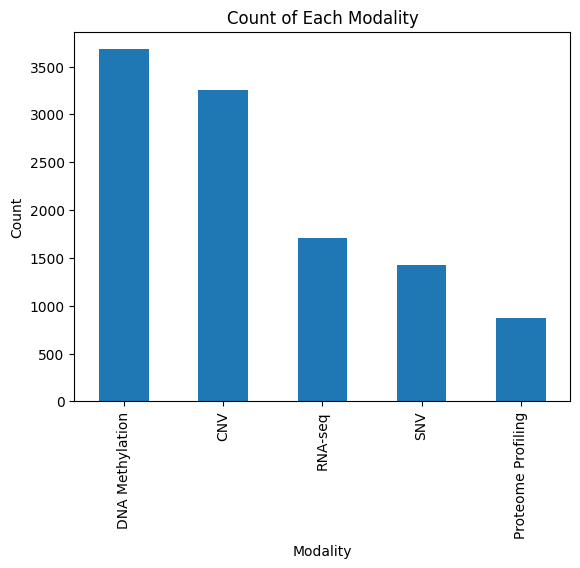

             Modality  Count
0     DNA Methylation   3680
1                 CNV   3256
2             RNA-seq   1710
3                 SNV   1423
4  Proteome Profiling    873


In [19]:
# See what imaging modalities are available and how much
modality_counts = all_df2['Modality'].value_counts().reset_index()
all_df2['Modality'].value_counts().plot(kind='bar', title='Count of Each Modality')
plt.xlabel('Modality'); plt.ylabel('Count'); plt.show()
modality_counts.columns = ['Modality', 'Count']
print(modality_counts)

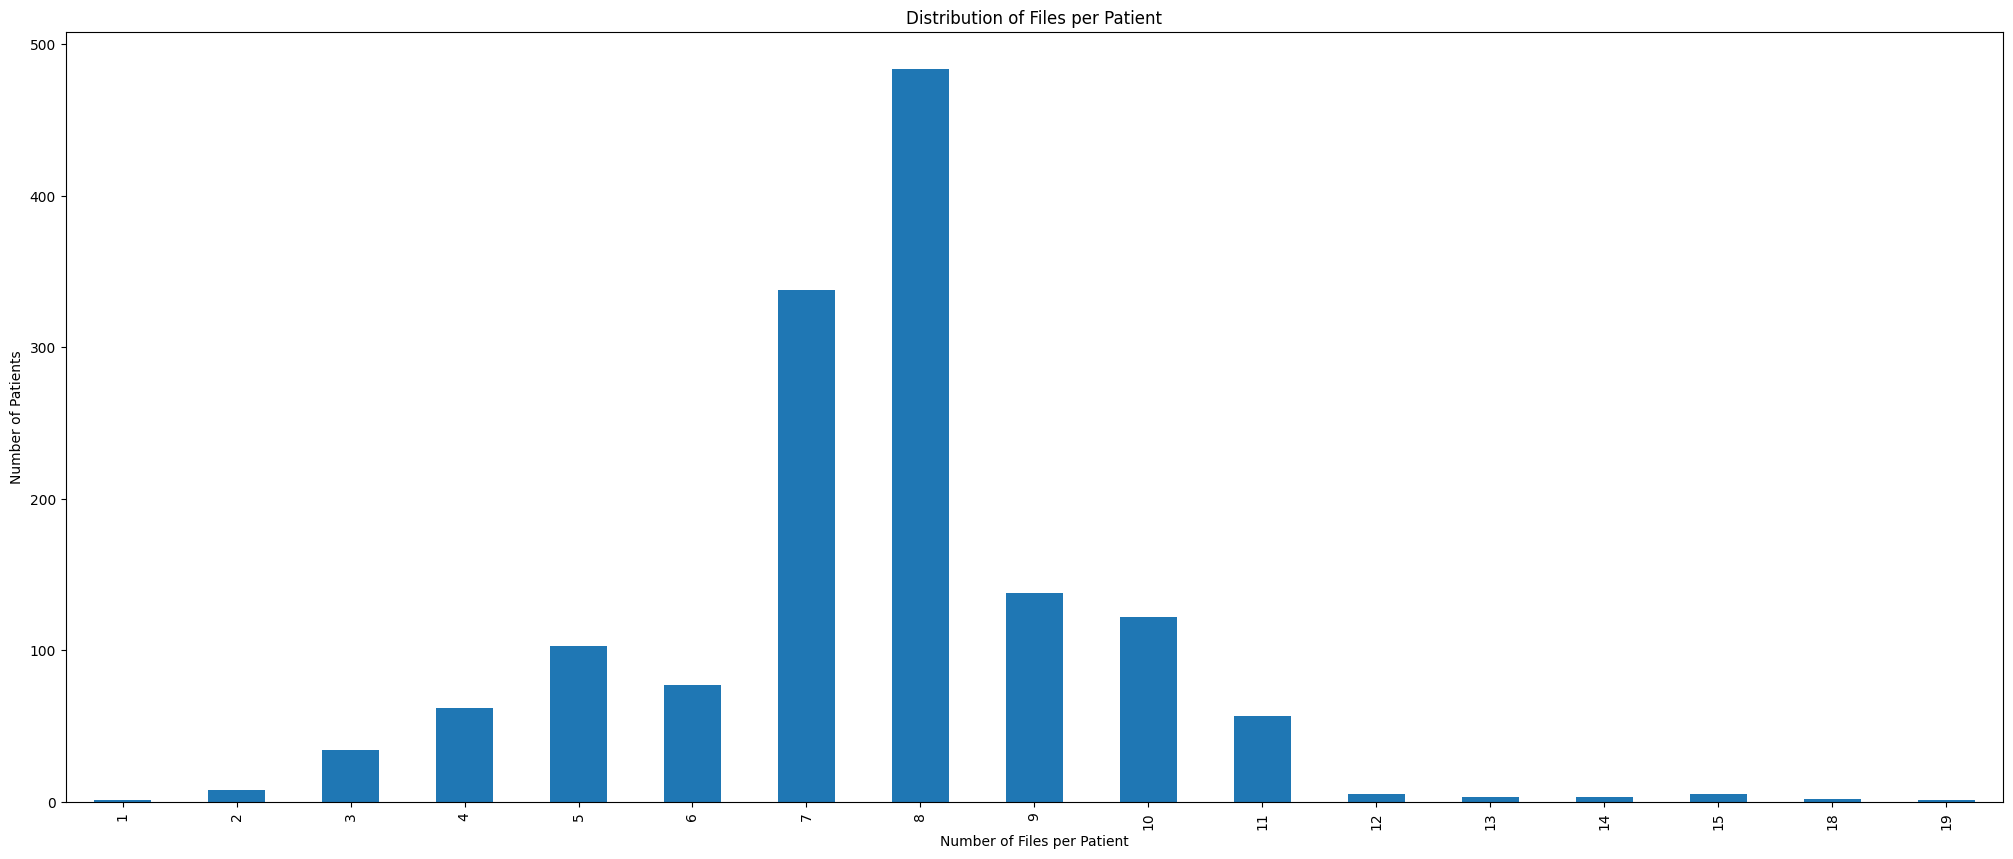

    num_files  num_patients
0           1             1
1           2             8
2           3            34
3           4            62
4           5           103
5           6            77
6           7           338
7           8           484
8           9           138
9          10           122
10         11            57
11         12             5
12         13             3
13         14             3
14         15             5
15         18             2
16         19             1


In [20]:
# See how many images are available per patient
counts = all_df2.groupby('PatientID').size()

plt.figure(figsize=(25,10))
counts.value_counts().sort_index().plot(kind='bar', title='Distribution of Files per Patient')
plt.xlabel('Number of Files per Patient'); plt.ylabel('Number of Patients'); plt.show()

distribution_table = counts.value_counts().sort_index().reset_index()
distribution_table.columns = ['num_files', 'num_patients']
print(distribution_table)

In [22]:
# Seemed some patients have more than 10 files, which is suspicious!!! Let's check.
counts = all_df2.groupby('PatientID').size()
patients_over_10 = counts[counts > 10]
print(patients_over_10)

PatientID
C3N-00194       15
C3N-00310       19
C3N-00312       18
C3N-00437       14
C3N-00494       15
                ..
TCGA-E2-A15E    14
TCGA-E2-A15I    11
TCGA-E2-A15K    18
TCGA-E2-A15M    11
TCGA-E2-A1L7    11
Length: 76, dtype: int64


   Number of Unique Modalities  Number of Patients
0                            1                   8
1                            2                  41
2                            3                 320
3                            4                 355
4                            5                 719


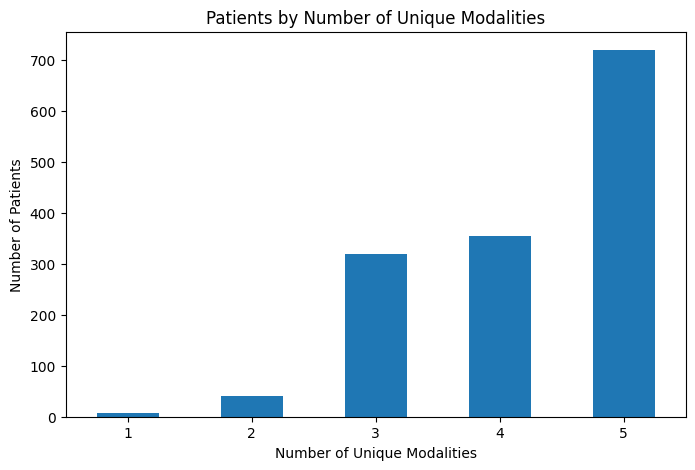

In [25]:
# See how many unique imaging modalities are available per patient
dist = all_df2.groupby('PatientID')['Modality'].nunique().value_counts().sort_index()
table = dist.reset_index()
table.columns = ['Number of Unique Modalities', 'Number of Patients']
print(table)

dist.plot(kind='bar', title='Patients by Number of Unique Modalities', figsize=(8,5))
plt.xlabel('Number of Unique Modalities'); plt.ylabel('Number of Patients'); plt.xticks(rotation=0)
plt.show()